# Sleep Efficiency Dataset

### EDA and Data Cleaning



In [1]:
# Loading packages that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

### Loading & Analyzing the data

In [2]:
# Loading data
sleepy_df = pd.read_csv('Sleep_Efficiency.csv')
sleepy_df.head(3)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0


In [3]:
# Analyzing the columns
sleepy_df.columns.unique()

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [4]:
# Analyzing the data type and number of NaNs
sleepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [5]:
nancount = sleepy_df.isna().sum()
print(nancount)

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


In [6]:
# How many duplicates are present
print(sleepy_df.duplicated().sum())

0


### Uniforming the columns

In [7]:
#Lower case all the columns
def lower_case_column_names():
    sleepy_df.columns=[i.lower() for i in sleepy_df.columns]
    return sleepy_df

In [8]:
sleepy_df = lower_case_column_names()

In [9]:
# Renaming the columns with underscores 
def rename_columns(sleepy_df):
    sleepy_df.rename(columns={'wakeup time':'wakeup_time', 'sleep duration':'sleep_duration',
                              'sleep efficiency':'sleep_efficiency', 'rem sleep percentage':'rem_sleep_percentage',
                             'deep sleep percentage':'deep_sleep_percentage','light sleep percentage':'light_sleep_percentage',
                             'caffeine consumption':'caffeine_consumption', 'alcohol consumption':'alcohol_consumption',
                             'smoking status':'smoking_status','exercise frequency':'exercise_frequency'}, inplace=True )
    return sleepy_df
sleepy_df=rename_columns(sleepy_df)

sleepy_df.head(3)

,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0


In [10]:
# Checking for typos in text columns
sleepy_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
sleepy_df['smoking_status'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# Calculating the mean of every column, which contains NaNs. 
# These values will be later used for substituting the NaNs with the respective mean of the respective column

def mean_without_nans(sleepy_df, column_name):

# Get the column as a pandas Series
    column = sleepy_df[column_name]
    
# Initialize a sum (=total) and a count
    total = 0
    count = 0
    
# Loop over the values in the column
    for value in column.values:
        if pd.notnull(value):
            total += value
            count += 1
    
# Return the mean of the non-NaN values
    return total / count if count != 0 else float("nan")


In [13]:
# Call the mean_without_nans function on column with nans
mean_awakenings = mean_without_nans(sleepy_df, 'awakenings')
mean_caffeine_consumption = mean_without_nans(sleepy_df, 'caffeine_consumption')
mean_alcohol_consumption = mean_without_nans(sleepy_df, 'alcohol_consumption')
mean_exercise_frequency = mean_without_nans(sleepy_df, 'exercise_frequency')
print ('mean_awakenings: ', mean_awakenings, \
      'mean_caffeine_consumption: ', mean_caffeine_consumption, \
      'mean_alcohol_consumption: ', mean_alcohol_consumption, \
      'mean_exercise_frequency: ', mean_exercise_frequency)

mean_awakenings:  1.6412037037037037 mean_caffeine_consumption:  23.653395784543324 mean_alcohol_consumption:  1.17351598173516 mean_exercise_frequency:  1.7914798206278026


In [14]:
# Fill nans with the mean. We asume the person consumes an average amount of coffe & alcohol, plus they have 
# an average amount of sport-time and awakenings during the night.

sleepy_df['awakenings'] = sleepy_df[['awakenings']].fillna(mean_awakenings) #imputation 

In [15]:
# Controling if the values are being replaced
sleepy_df['awakenings'].unique()

array([0.       , 3.       , 1.       , 2.       , 4.       , 1.6412037])

In [16]:
sleepy_df['caffeine_consumption'] = sleepy_df[['caffeine_consumption']].fillna(mean_caffeine_consumption)

In [17]:
sleepy_df['caffeine_consumption'].unique()

array([  0.        ,  50.        ,  23.65339578,  25.        ,
        75.        , 200.        , 100.        ])

In [18]:
sleepy_df['alcohol_consumption'] = sleepy_df[['alcohol_consumption']].fillna(mean_alcohol_consumption)

In [19]:
sleepy_df['alcohol_consumption'].unique()

array([0.        , 3.        , 5.        , 1.        , 2.        ,
       1.17351598, 4.        ])

In [20]:
sleepy_df['exercise_frequency'] = sleepy_df[['exercise_frequency']].fillna(mean_exercise_frequency)

In [21]:
sleepy_df['exercise_frequency'].unique()

array([3.        , 1.        , 0.        , 5.        , 2.        ,
       4.        , 1.79147982])

<b/> Change data-type for time-stamps and Bin them

In [22]:
# Split the 'bedtime' column into date and time columns
sleepy_df[['bedtime_date', 'bedtime_time']] = sleepy_df['bedtime'].str.split(' ', 1, expand=True)

In [23]:
# Drop the original 'bedtime' column
sleepy_df.drop('bedtime', axis=1, inplace=True)

In [24]:
# Split the 'wakeup' column into date and time columns
sleepy_df[['wakeup_time_date', 'wakeup_time_time']] = sleepy_df['wakeup_time'].str.split(' ', 1, expand=True)

In [25]:
# Drop the original 'wakeup_time' column
sleepy_df.drop('wakeup_time', axis=1, inplace=True)

<b/> Mantain the month, of date columns. For this research we do not need the year or day

In [26]:
sleepy_df['bedtime_date']

0      2021-03-06
1      2021-12-05
2      2021-05-25
3      2021-11-03
4      2021-03-13
          ...    
447    2021-11-13
448    2021-03-31
449    2021-09-07
450    2021-07-29
451    2021-03-17
Name: bedtime_date, Length: 452, dtype: object

In [27]:
sleepy_df['bedtime_date'] = pd.to_datetime(sleepy_df['bedtime_date'])

In [28]:
sleepy_df['month'] = sleepy_df['bedtime_date'].dt.month

In [29]:
# Drop 'bedtime_date' & 'wakeup_time_date'
sleepy_df.drop('bedtime_date', axis=1, inplace=True)

In [30]:
sleepy_df.drop('wakeup_time_date', axis=1, inplace=True)

In [31]:
sleepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      452 non-null    int64  
 1   age                     452 non-null    int64  
 2   gender                  452 non-null    object 
 3   sleep_duration          452 non-null    float64
 4   sleep_efficiency        452 non-null    float64
 5   rem_sleep_percentage    452 non-null    int64  
 6   deep_sleep_percentage   452 non-null    int64  
 7   light_sleep_percentage  452 non-null    int64  
 8   awakenings              452 non-null    float64
 9   caffeine_consumption    452 non-null    float64
 10  alcohol_consumption     452 non-null    float64
 11  smoking_status          452 non-null    object 
 12  exercise_frequency      452 non-null    float64
 13  bedtime_time            452 non-null    object 
 14  wakeup_time_time        452 non-null    ob

<b/>Dummies

In [32]:
# converting nominal values
sleepy_df = pd.get_dummies(sleepy_df, columns=['gender', 'smoking_status',], drop_first=True)
sleepy_df

,id,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,bedtime_time,wakeup_time_time,month,gender_Male,smoking_status_Yes
0,1,65,6.0,0.88,18,70,12,0.0,0.000000,0.0,3.0,01:00:00,07:00:00,3,0,1
1,2,69,7.0,0.66,19,28,53,3.0,0.000000,3.0,3.0,02:00:00,09:00:00,12,1,1
2,3,40,8.0,0.89,20,70,10,1.0,0.000000,0.0,3.0,21:30:00,05:30:00,5,0,0
3,4,40,6.0,0.51,23,25,52,3.0,50.000000,5.0,1.0,02:30:00,08:30:00,11,0,1
4,5,57,8.0,0.76,27,55,18,3.0,0.000000,3.0,3.0,01:00:00,09:00:00,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,7.5,0.91,22,57,21,0.0,0.000000,0.0,5.0,22:00:00,05:30:00,11,0,0
448,449,52,6.0,0.74,28,57,15,4.0,25.000000,0.0,3.0,21:00:00,03:00:00,3,1,0
449,450,40,8.5,0.55,20,32,48,1.0,23.653396,3.0,0.0,23:00:00,07:30:00,9,0,1
450,451,45,7.0,0.76,18,72,10,3.0,0.000000,0.0,3.0,21:00:00,04:00:00,7,1,0


In [33]:
sleepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      452 non-null    int64  
 1   age                     452 non-null    int64  
 2   sleep_duration          452 non-null    float64
 3   sleep_efficiency        452 non-null    float64
 4   rem_sleep_percentage    452 non-null    int64  
 5   deep_sleep_percentage   452 non-null    int64  
 6   light_sleep_percentage  452 non-null    int64  
 7   awakenings              452 non-null    float64
 8   caffeine_consumption    452 non-null    float64
 9   alcohol_consumption     452 non-null    float64
 10  exercise_frequency      452 non-null    float64
 11  bedtime_time            452 non-null    object 
 12  wakeup_time_time        452 non-null    object 
 13  month                   452 non-null    int64  
 14  gender_Male             452 non-null    ui

<b/> Convert the time-data type into float, for the model

In [34]:
# Converting the time into hours - integers for bedtime_time

# Convert the time column to datetime data type
sleepy_df['bedtime_time'] = pd.to_datetime(sleepy_df['bedtime_time'], format='%H:%M:%S')

# Extract the hour, minute, and second components
sleepy_df['hour'] = sleepy_df['bedtime_time'].dt.hour
sleepy_df['minute'] = sleepy_df['bedtime_time'].dt.minute
sleepy_df['second'] = sleepy_df['bedtime_time'].dt.second

# Convert the time to hours as a float
sleepy_df['bedtime_hours'] = (sleepy_df['hour'] + sleepy_df['minute'] / 60 + sleepy_df['second'] / 3600).round(2)

sleepy_df = sleepy_df.drop(columns= ['hour','minute','second','bedtime_time'])
sleepy_df

,id,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,wakeup_time_time,month,gender_Male,smoking_status_Yes,bedtime_hours
0,1,65,6.0,0.88,18,70,12,0.0,0.000000,0.0,3.0,07:00:00,3,0,1,1.0
1,2,69,7.0,0.66,19,28,53,3.0,0.000000,3.0,3.0,09:00:00,12,1,1,2.0
2,3,40,8.0,0.89,20,70,10,1.0,0.000000,0.0,3.0,05:30:00,5,0,0,21.5
3,4,40,6.0,0.51,23,25,52,3.0,50.000000,5.0,1.0,08:30:00,11,0,1,2.5
4,5,57,8.0,0.76,27,55,18,3.0,0.000000,3.0,3.0,09:00:00,3,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,7.5,0.91,22,57,21,0.0,0.000000,0.0,5.0,05:30:00,11,0,0,22.0
448,449,52,6.0,0.74,28,57,15,4.0,25.000000,0.0,3.0,03:00:00,3,1,0,21.0
449,450,40,8.5,0.55,20,32,48,1.0,23.653396,3.0,0.0,07:30:00,9,0,1,23.0
450,451,45,7.0,0.76,18,72,10,3.0,0.000000,0.0,3.0,04:00:00,7,1,0,21.0


In [37]:
# Converting the time into hours - integers for wakeuptime_time

# Convert the time column to datetime data type
sleepy_df['wakeup_time_time'] = pd.to_datetime(sleepy_df['wakeup_time_time'], format='%H:%M:%S')

# Extract the hour, minute, and second components
sleepy_df['hour'] = sleepy_df['wakeup_time_time'].dt.hour
sleepy_df['minute'] = sleepy_df['wakeup_time_time'].dt.minute
sleepy_df['second'] = sleepy_df['wakeup_time_time'].dt.second

# Convert the time to hours as a float
sleepy_df['wakeup_time_hours'] = (sleepy_df['hour'] + sleepy_df['minute'] / 60 + sleepy_df['second'] / 3600).round(2)

sleepy_df = sleepy_df.drop(columns= ['hour','minute','second','wakeup_time_time'])
sleepy_df

,id,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,month,gender_Male,smoking_status_Yes,bedtime_hours,wakeup_time_hours
0,1,65,6.0,0.88,18,70,12,0.0,0.000000,0.0,3.0,3,0,1,1.0,7.0
1,2,69,7.0,0.66,19,28,53,3.0,0.000000,3.0,3.0,12,1,1,2.0,9.0
2,3,40,8.0,0.89,20,70,10,1.0,0.000000,0.0,3.0,5,0,0,21.5,5.5
3,4,40,6.0,0.51,23,25,52,3.0,50.000000,5.0,1.0,11,0,1,2.5,8.5
4,5,57,8.0,0.76,27,55,18,3.0,0.000000,3.0,3.0,3,1,0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,7.5,0.91,22,57,21,0.0,0.000000,0.0,5.0,11,0,0,22.0,5.5
448,449,52,6.0,0.74,28,57,15,4.0,25.000000,0.0,3.0,3,1,0,21.0,3.0
449,450,40,8.5,0.55,20,32,48,1.0,23.653396,3.0,0.0,9,0,1,23.0,7.5
450,451,45,7.0,0.76,18,72,10,3.0,0.000000,0.0,3.0,7,1,0,21.0,4.0


In [51]:
# we will drop the id column since we do not need it for the regression
sleepy_df = sleepy_df.drop(['id'], axis=1)
sleepy_df

,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,month,gender_Male,smoking_status_Yes,bedtime_hours,wakeup_time_hours
0,65,6.0,0.88,18,70,12,0.0,0.000000,0.0,3.0,3,0,1,1.0,7.0
1,69,7.0,0.66,19,28,53,3.0,0.000000,3.0,3.0,12,1,1,2.0,9.0
2,40,8.0,0.89,20,70,10,1.0,0.000000,0.0,3.0,5,0,0,21.5,5.5
3,40,6.0,0.51,23,25,52,3.0,50.000000,5.0,1.0,11,0,1,2.5,8.5
4,57,8.0,0.76,27,55,18,3.0,0.000000,3.0,3.0,3,1,0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,7.5,0.91,22,57,21,0.0,0.000000,0.0,5.0,11,0,0,22.0,5.5
448,52,6.0,0.74,28,57,15,4.0,25.000000,0.0,3.0,3,1,0,21.0,3.0
449,40,8.5,0.55,20,32,48,1.0,23.653396,3.0,0.0,9,0,1,23.0,7.5
450,45,7.0,0.76,18,72,10,3.0,0.000000,0.0,3.0,7,1,0,21.0,4.0


#### Visualization of dataset

<AxesSubplot:>

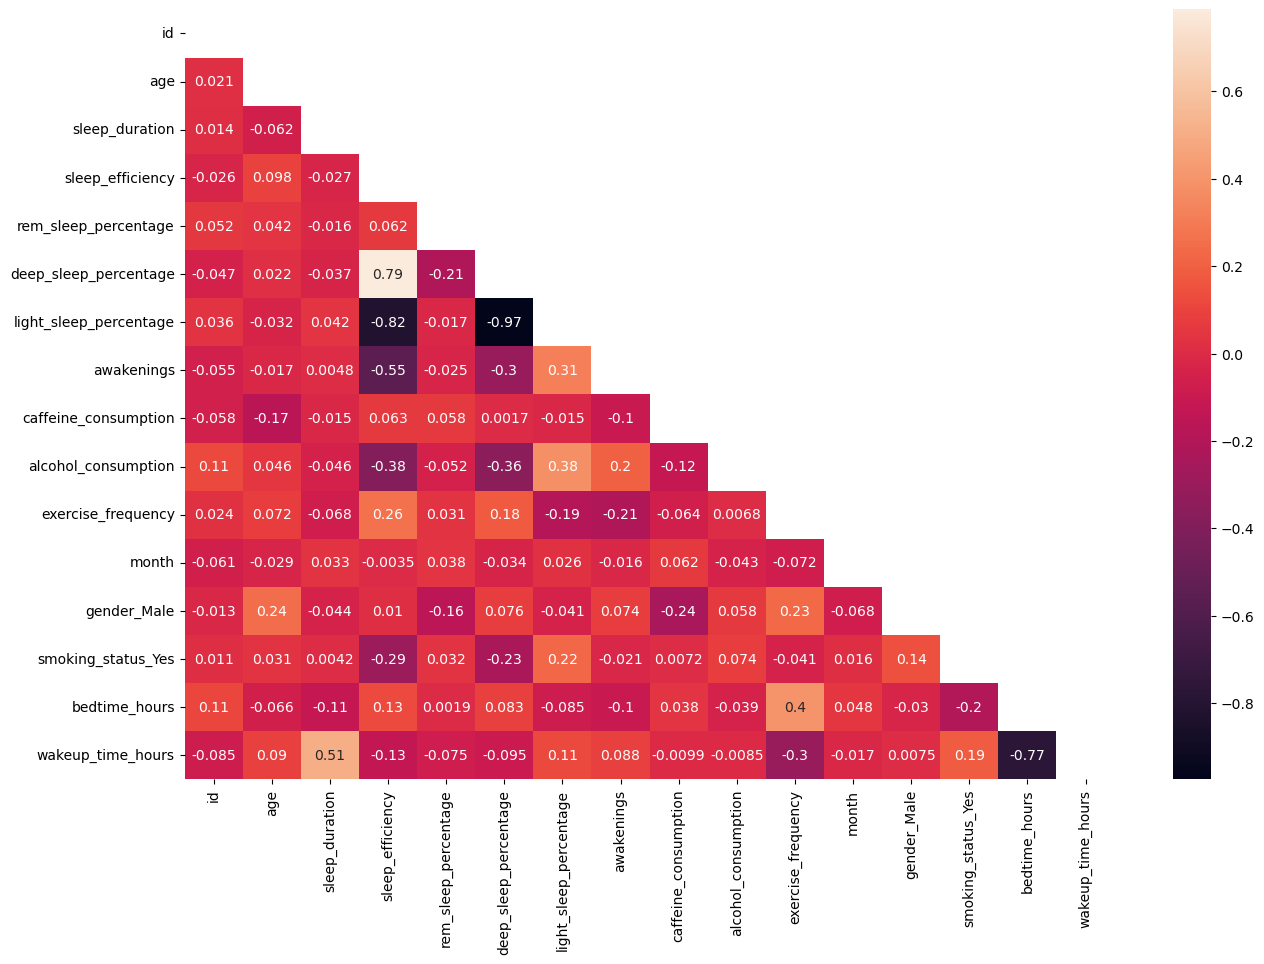

In [48]:
# Correlation Matrix
heatmap = plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(sleepy_df.corr(), dtype=bool))
sns.heatmap(sleepy_df.corr(), annot=True, mask=mask)

# Notes:
# Variables that are the opposite of each other, have a hight correlation (ex. Light and deep sleep)
# Highest correlation with target varaible 'sleep_efficiency':
## light and deep sleep percentage
## awakenings



array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sleep_duration'}>,
        <AxesSubplot:title={'center':'sleep_efficiency'}>],
       [<AxesSubplot:title={'center':'rem_sleep_percentage'}>,
        <AxesSubplot:title={'center':'deep_sleep_percentage'}>,
        <AxesSubplot:title={'center':'light_sleep_percentage'}>,
        <AxesSubplot:title={'center':'awakenings'}>],
       [<AxesSubplot:title={'center':'caffeine_consumption'}>,
        <AxesSubplot:title={'center':'alcohol_consumption'}>,
        <AxesSubplot:title={'center':'exercise_frequency'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'gender_Male'}>,
        <AxesSubplot:title={'center':'smoking_status_Yes'}>,
        <AxesSubplot:title={'center':'bedtime_hours'}>,
        <AxesSubplot:title={'center':'wakeup_time_hours'}>]], dtype=object)

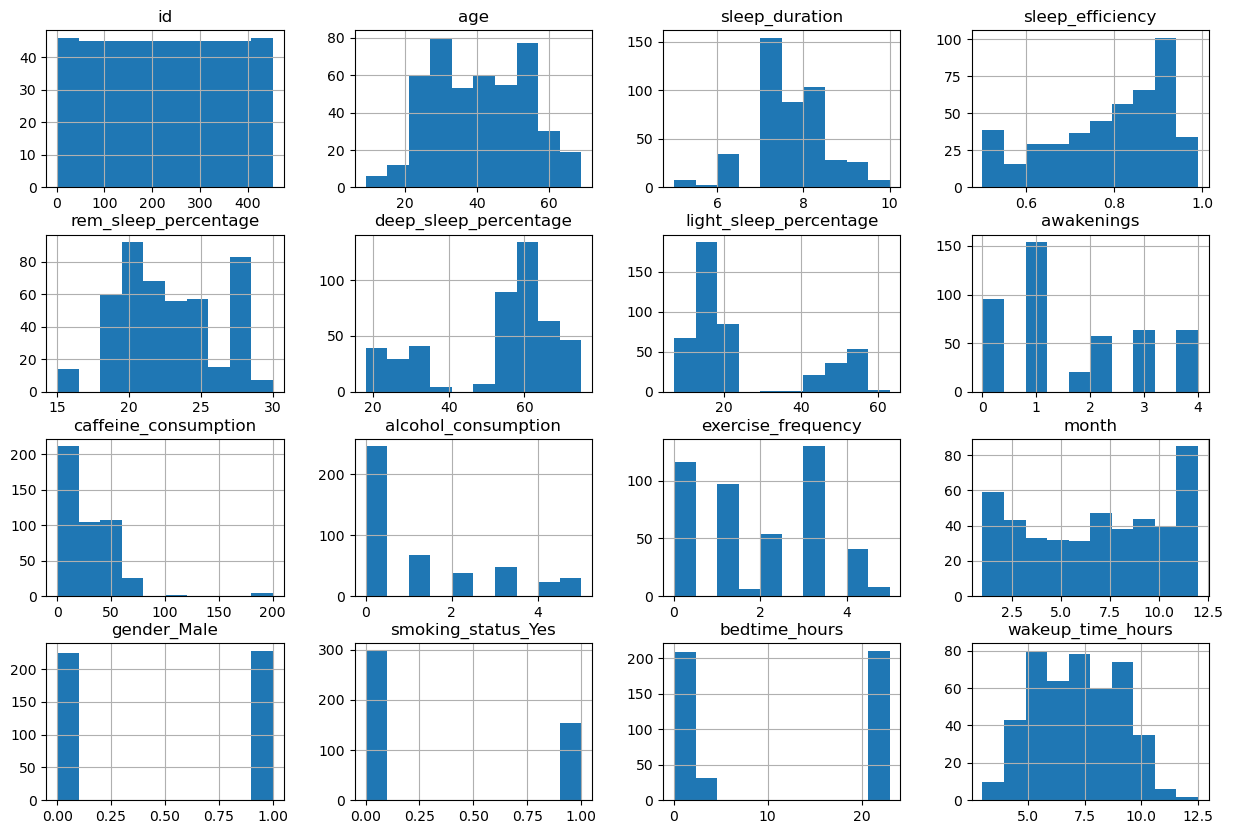

In [45]:
# Histograms for every Variable
sleepy_df.hist(figsize=(15,10))

In [65]:
# Outliers in caffeine?
unique_caffeine = sleepy_df['caffeine_consumption'].value_counts()
print(unique_caffeine)

0.000000      211
50.000000     107
25.000000      79
23.653396      25
75.000000      25
200.000000      4
100.000000      1
Name: caffeine_consumption, dtype: int64


<b/> transforming target variable (right skew)

In [74]:
# targetvar Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution
from sklearn.preprocessing import StandardScaler

# Create an instance of the standardscaler
scaler = StandardScaler()

In [75]:
target_var = sleepy_df['sleep_efficiency']
target_var = target_var.values.reshape(-1, 1)

In [76]:
# Fit the scaler to the dataset
scaler.fit(target_var)

StandardScaler()

(array([ 39.,  16.,  29.,  29.,  37.,  45.,  56.,  66., 101.,  34.]),
 array([-2.13873348, -1.77600533, -1.41327718, -1.05054903, -0.68782088,
        -0.32509273,  0.03763542,  0.40036357,  0.76309172,  1.12581987,
         1.48854802]),
 <BarContainer object of 10 artists>)

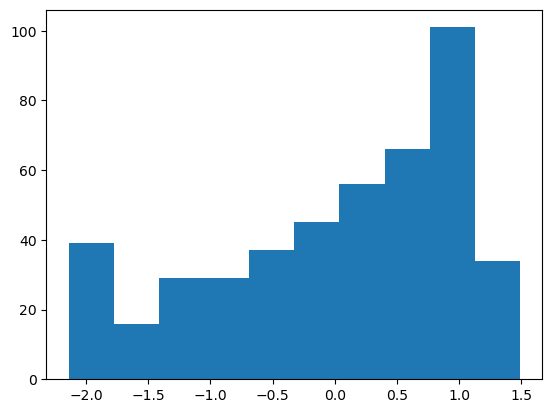

In [80]:
# Transform the dataset using the standardscaler
target_var_scaled = scaler.transform(target_var)
plt.hist(target_var_scaled)

<AxesSubplot:ylabel='Count'>

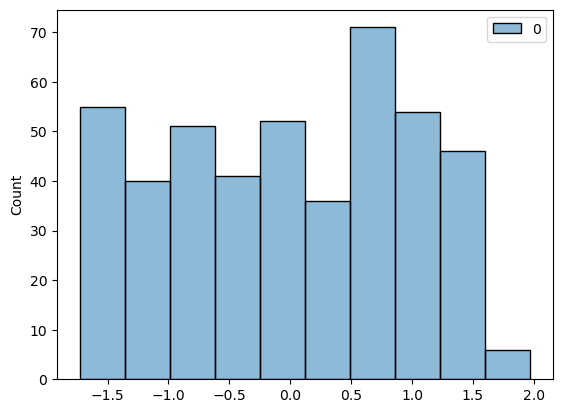

In [79]:
# Use the PowerTransformer - YeoJohnson
pt = PowerTransformer(method='yeo-johnson')
pt.fit(target_var_scaled)
target_var_scaled2 = pt.transform(target_var_scaled)
sns.histplot(target_var_scaled2)

## Modeling

In [81]:
TT_RATIO = 0.3 
RAND_STATE = 34 # for reproducible shuffling

In [83]:
# Y/Y Split
X = sleepy_df.drop('sleep_efficiency', axis=1)
y = sleepy_df.sleep_efficiency

In [84]:
# Train/ Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,age,sleep_duration,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,month,gender_Male,smoking_status_Yes,bedtime_hours,wakeup_time_hours
229,26,7.0,24,56,20,4.0,0.000000,0.000000,3.0,3,1,0,22.5,5.5
363,30,10.0,22,65,13,0.0,25.000000,1.000000,0.0,11,0,0,1.5,11.5
215,22,7.0,28,60,12,4.0,23.653396,5.000000,1.0,5,0,0,23.0,6.0
211,10,7.0,18,35,47,3.0,0.000000,0.000000,0.0,7,0,0,1.0,8.0
395,56,8.0,27,55,18,2.0,0.000000,1.173516,3.0,12,1,0,21.5,5.5


In [85]:
# Scaling
# PowerTransform
# Fit the scaler to the X_train
pt.fit(X_train)

PowerTransformer()

In [87]:
# Transform X_train using the scaler
X_train_scaled = pt.transform(X_train)
X_train_scaled

array([[-1.02855909, -0.52614849,  0.41960937, ..., -0.69038794,
         1.05267168, -0.81065994],
       [-0.70979789,  2.91348549, -0.12177873, ..., -0.69038794,
        -0.65083335,  2.21034954],
       [-1.35876456, -0.52614849,  1.45792584, ..., -0.69038794,
         1.06957959, -0.54496806],
       ...,
       [-0.94787639, -1.65028779,  0.6844535 , ...,  1.44846098,
        -1.29540771, -0.54496806],
       [ 0.62235773, -0.52614849, -0.12177873, ..., -0.69038794,
        -1.29540771, -0.02282261],
       [ 0.33812092, -0.52614849, -0.68033901, ...,  1.44846098,
         1.03541811, -1.07979919]])

In [88]:
# Transform X_test using the scaler
X_test_scaled = pt.transform(X_test)
X_test_scaled

array([[ 0.7623966 ,  0.60997381, -1.25833839, ...,  1.44846098,
         1.03541811, -0.54496806],
       [ 0.97004304, -0.52614849,  0.41960937, ..., -0.69038794,
         0.99981372, -1.62984121],
       [ 0.04782073,  0.60997381, -0.12177873, ..., -0.69038794,
         1.05267168, -0.28243729],
       ...,
       [ 0.12100215,  0.60997381, -0.68033901, ...,  1.44846098,
         1.03541811, -0.54496806],
       [-0.86787422, -0.52614849,  0.15093809, ..., -0.69038794,
         0.99981372, -1.62984121],
       [ 0.83192597,  0.60997381, -0.68033901, ..., -0.69038794,
         1.05267168, -0.28243729]])

In [89]:
# Train model 
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression ()
model_lr.fit(X_train_scaled, y_train)
print(f'Coefficients: {model_lr.coef_}')
print(f'Intercept: {model_lr.intercept_}')

Coefficients: [ 0.01436085  0.00289707  0.04213409  0.14941698  0.06083922 -0.04657362
  0.00448039 -0.00830539  0.00905635  0.00140352 -0.0025434  -0.02271015
 -0.00128915 -0.00381239]
Intercept: 0.785601265822785


In [102]:
# OLS Table
import statsmodels.api as sm
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant - Intercept # stats model = sm

model_OLS = sm.OLS(y_train, X_train_const_scaled).fit() 
predictions_train = model_OLS.predict(X_train_const_scaled)

#X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
#predictions_test_OLS = model_OLS.predict(X_test_const_scaled)

print_model_OLS = model_OLS.summary()
print(print_model_OLS) #test predictions are more relevant than train

                            OLS Regression Results                            
Dep. Variable:       sleep_efficiency   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     93.95
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          7.51e-101
Time:                        15:25:41   Log-Likelihood:                 448.67
No. Observations:                 316   AIC:                            -867.3
Df Residuals:                     301   BIC:                            -811.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7856      0.003    233.000      0.0

In [91]:
# Predictions 
y_pred_2 = pd.DataFrame(model_lr.predict(X_test_scaled),columns = ['sleep_efficiency'])
print(y_pred_2)

     sleep_efficiency
0            0.624896
1            0.895932
2            0.775059
3            0.595068
4            0.843178
..                ...
131          0.506809
132          0.888545
133          0.909862
134          0.859897
135          0.941157

[136 rows x 1 columns]


In [92]:
y_pred_train_2 =  pd.DataFrame(model_lr.predict(X_train_scaled),columns = ['sleep_efficiency'])
print(y_pred_train_2)

     sleep_efficiency
0            0.746318
1            0.917097
2            0.745051
3            0.548007
4            0.830256
..                ...
311          0.877110
312          0.820498
313          0.882355
314          0.838736
315          0.540158

[316 rows x 1 columns]


<b/> Error Metrics - Test set

In [93]:
print(f'Mean Square Errors (mse): {mse(y_test,y_pred_2)}')
print(f'Mean Absolut Errors (mae): {mae(y_test,y_pred_2)}')
print(f'Prediction on the train set: {mse(y_train,y_pred_train_2)}')

Mean Square Errors (mse): 0.003926430100518405
Mean Absolut Errors (mae): 0.05115122234030719
Prediction on the train set: 0.0034218409260626894


In [94]:
R2=r2_score(y_test,y_pred_2)
R2

0.7802893348613712

In [95]:
R2_test=model_lr.score(X_test_scaled,y_test)
R2_train=model_lr.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7548682661676456

<b/> Feature Importance

In [96]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': (model_lr.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
3,deep_sleep_percentage,0.149417
4,light_sleep_percentage,0.060839
2,rem_sleep_percentage,0.042134
0,age,0.014361
8,exercise_frequency,0.009056
6,caffeine_consumption,0.004480
1,sleep_duration,0.002897
9,month,0.001404
12,bedtime_hours,-0.001289
10,gender_Male,-0.002543


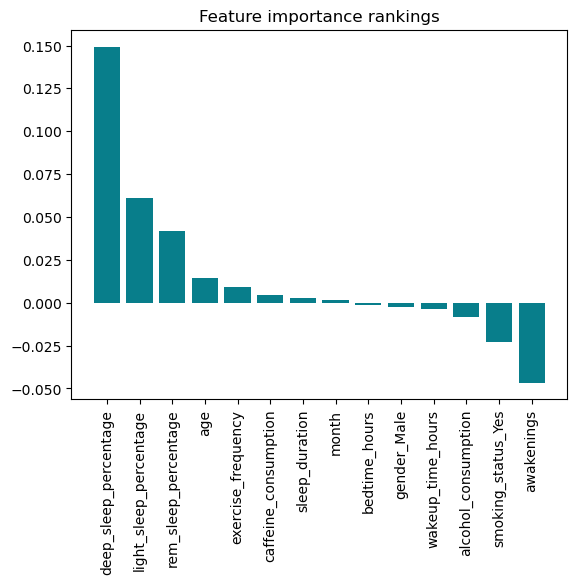

In [101]:
plt.bar(x=features_importances['Attribute'].iloc[:15], height=features_importances['Importance'].iloc[:15], color='#087E8B')
plt.title ('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

## Evaluating model performance

ValueError: autodetected range of [nan, nan] is not finite

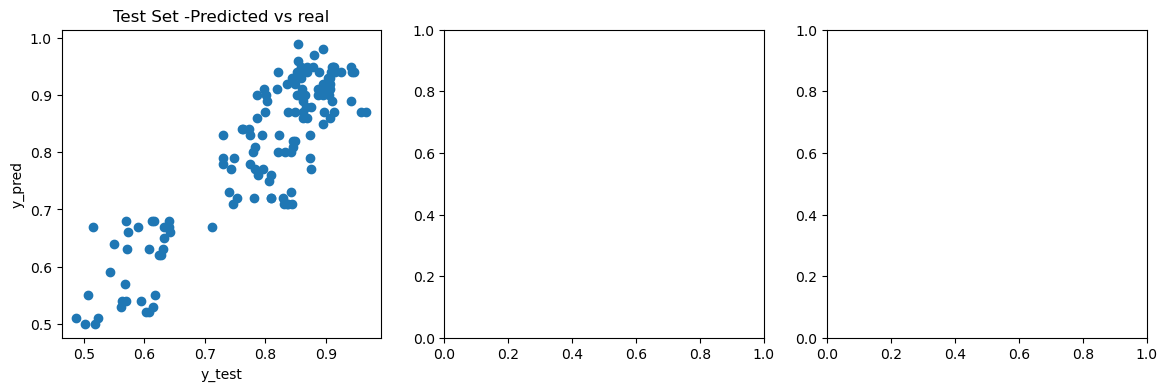

In [113]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_2, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist((y_test) - (y_pred_2))
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_2,y_pred_2.to_numpy()-y_test.to_numpy(),"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_2,np.zeros(len(y_pred_2)),linestyle='dashed')
